In [38]:
"""
Authors:
    Jhonatan Guilherme de Oliveira Cunha (2135590)
    Jessé Pires Barbato Rocha            (2149389)
"""


import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

# SVM
from utils.do_cv_svm import do_cv_svm

# K-NN
from utils.do_cv_knn import do_cv_knn

# Random Forest
from utils.do_cv_random_forest import do_cv_random_forest

# Decision Tree
from utils.do_cv_decision_tree import do_cv_decision_tree

# MLP
from utils.do_cv_mlp import do_cv_mlp

# Utils
from utils.generateDatasetWithClass import generateDatasetWithClass

In [22]:
def calcular_estatisticas(resultados):
    return np.mean(resultados), np.std(resultados), np.min(resultados), np.max(resultados)

def imprimir_estatisticas(resultados):
    media, desvio, mini, maxi = calcular_estatisticas(resultados)
    print("Resultados: %.2f +- %.2f, min: %.2f, max: %.2f" % (media, desvio, mini, maxi))

### Carregando dataset de caracteristicas oBIFS

In [3]:
dataset_obifs = pd.read_csv('gender_dataset_obifs.csv', header=None)
dataset_obifs_len = len(dataset_obifs.columns) - 1

dataset_obifs

,0,1,2,3,4,5,6,7,8,9,...,475,476,477,478,479,480,481,482,483,484
0,2132.0,521.0,90.0,5.0,42.0,18.0,48.0,680.0,98.0,203.0,...,225.0,15.0,4.0,12.0,23.0,56.0,2.0,20.0,57.0,1.0
1,4075.0,1179.0,103.0,16.0,8.0,17.0,121.0,912.0,157.0,192.0,...,331.0,63.0,11.0,15.0,74.0,71.0,17.0,66.0,157.0,1.0
2,4280.0,1051.0,101.0,4.0,1.0,2.0,65.0,994.0,164.0,168.0,...,422.0,72.0,12.0,16.0,55.0,108.0,10.0,29.0,118.0,1.0
3,3320.0,928.0,54.0,6.0,11.0,18.0,69.0,786.0,122.0,109.0,...,338.0,36.0,8.0,7.0,52.0,77.0,0.0,29.0,79.0,1.0
4,4373.0,934.0,73.0,1.0,30.0,17.0,93.0,1273.0,191.0,235.0,...,398.0,59.0,10.0,19.0,74.0,68.0,10.0,49.0,135.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2972.0,523.0,22.0,7.0,1.0,7.0,45.0,451.0,57.0,170.0,...,272.0,28.0,1.0,14.0,46.0,53.0,4.0,45.0,120.0,0.0
396,2234.0,473.0,30.0,1.0,4.0,2.0,50.0,501.0,106.0,143.0,...,233.0,25.0,5.0,27.0,49.0,53.0,5.0,33.0,102.0,0.0
397,3001.0,411.0,51.0,6.0,50.0,10.0,51.0,432.0,66.0,167.0,...,306.0,39.0,7.0,15.0,61.0,89.0,3.0,61.0,148.0,0.0
398,1972.0,383.0,21.0,2.0,15.0,5.0,26.0,331.0,59.0,107.0,...,225.0,33.0,1.0,4.0,20.0,22.0,3.0,31.0,49.0,0.0


In [4]:
y_obifs = dataset_obifs[dataset_obifs_len].values.ravel()
X_obifs = dataset_obifs.drop([dataset_obifs_len], axis=1).values
X_obifs_columns = dataset_obifs.drop([dataset_obifs_len], axis=1).columns
y_obifs_classes = np.unique(y_obifs).astype(str)

y_obifs_classes

array(['0.0', '1.0'], dtype='<U32')

### Carregando dataset de caracteristicas BSIF

In [5]:
dataset_bsif = pd.read_csv('gender_dataset_bsif.csv', header=None)
dataset_bsif_len = len(dataset_bsif.columns) - 1

dataset_bsif

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,0.001981,0.001687,0.003587,0.000611,0.001520,0.003356,0.001153,0.000339,0.000416,0.000751,...,0.000597,0.000543,0.001759,0.000398,0.000502,0.001235,0.002741,0.000366,0.001312,1.0
1,0.003424,0.002628,0.004432,0.000954,0.002610,0.005011,0.001678,0.000814,0.001063,0.001176,...,0.001805,0.001108,0.002840,0.000579,0.001013,0.002474,0.003582,0.000905,0.002528,1.0
2,0.002677,0.003333,0.004821,0.000606,0.002053,0.004839,0.001606,0.000850,0.000846,0.000841,...,0.001411,0.000977,0.002777,0.000669,0.000805,0.002221,0.003460,0.000972,0.002573,1.0
3,0.002117,0.002542,0.003817,0.000543,0.001755,0.004554,0.001556,0.000687,0.000525,0.000678,...,0.001000,0.000859,0.002374,0.000660,0.000728,0.001728,0.002813,0.000787,0.001719,1.0
4,0.002858,0.002818,0.004826,0.000954,0.002298,0.005283,0.001786,0.000886,0.000850,0.001162,...,0.001199,0.001000,0.002971,0.000796,0.001067,0.002230,0.003795,0.000819,0.002311,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.001194,0.001687,0.002239,0.000299,0.001443,0.002913,0.000868,0.000412,0.000231,0.000597,...,0.000547,0.000461,0.001705,0.000466,0.000592,0.001095,0.001737,0.000262,0.000791,0.0
396,0.001248,0.001506,0.002198,0.000204,0.001642,0.003315,0.000846,0.000412,0.000294,0.000534,...,0.000701,0.000443,0.001741,0.000448,0.000588,0.001199,0.001791,0.000425,0.001719,0.0
397,0.001841,0.001764,0.002646,0.000326,0.001217,0.003582,0.000864,0.000403,0.000357,0.000565,...,0.000850,0.000520,0.001755,0.000416,0.000597,0.001420,0.002135,0.000425,0.001673,0.0
398,0.000941,0.000918,0.001565,0.000217,0.000886,0.002361,0.000633,0.000353,0.000204,0.000403,...,0.000583,0.000348,0.001393,0.000303,0.000384,0.000801,0.001615,0.000267,0.000995,0.0


In [6]:
y_bsif = dataset_bsif[dataset_bsif_len].values.ravel()
X_bsif = dataset_bsif.drop([dataset_bsif_len], axis=1).values
X_bsif_columns = dataset_bsif.drop([dataset_bsif_len], axis=1).columns
y_bsif_classes = np.unique(y_bsif).astype(str)

X_bsif

array([[0.001981, 0.001687, 0.003587, ..., 0.002741, 0.000366, 0.001312],
       [0.003424, 0.002628, 0.004432, ..., 0.003582, 0.000905, 0.002528],
       [0.002677, 0.003333, 0.004821, ..., 0.00346 , 0.000972, 0.002573],
       ...,
       [0.001841, 0.001764, 0.002646, ..., 0.002135, 0.000425, 0.001673],
       [0.000941, 0.000918, 0.001565, ..., 0.001615, 0.000267, 0.000995],
       [0.001081, 0.001063, 0.001958, ..., 0.001646, 0.000339, 0.001076]])

# Normalizando os dados extraídos com o oBIFS

In [7]:
ss_obifs = StandardScaler()
ss_obifs.fit(X_obifs)
X_obifs_ss = ss_obifs.transform(X_obifs)

X_obifs_ss

array([[-0.22908933, -0.54746885, -0.03277022, ..., -1.48288186,
        -1.28248433, -1.42347466],
       [ 2.11973889,  2.11881174,  0.20423276, ...,  1.12476502,
         1.5452822 ,  1.3619175 ],
       [ 2.36755658,  1.60014318,  0.16777076, ..., -0.09213686,
        -0.72922566,  0.27561455],
       ...,
       [ 0.82141593, -0.99319965, -0.74377915, ..., -1.30903874,
         1.23791627,  1.1112322 ],
       [-0.42250802, -1.1066584 , -1.2907091 , ..., -1.30903874,
        -0.60627929, -1.64630604],
       [-0.19765879, -1.34573219, -1.38186409, ..., -0.26597998,
        -0.48333292, -1.50703643]])

# Utilizando o SVM para classificação oBIFS

In [8]:
svm_obifs, confusion_matrix_list_svm_obifs = do_cv_svm(X_obifs_ss, y_obifs, 10, 5, params={'C' : [1, 10, 100, 1000], 'gamma' : ['auto', 'scale', 2e-2, 2e-3, 2e-4], 'kernel': ['rbf']}, n_jobs=-1)
imprimir_estatisticas(svm_obifs)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.96 +- 0.03, min: 0.90, max: 1.00


# Usando K-NN com os dados extraídos com o oBIFS

In [9]:
knn_obifs, confusion_matrix_list_knn_obifs = do_cv_knn(X_obifs_ss, y_obifs, 10, 5, params={'n_neighbors' : range(1,30,2)}, n_jobs=-1)
imprimir_estatisticas(knn_obifs)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

[array([[19,  1],
       [ 2, 18]])] 

[array([[19,  1],
       [ 2, 18]]), array([[19,  1],
       [ 3, 17]])] 

[array([[19,  1],
       [ 2, 18]]), array([[19,  1],
       [ 3, 17]]), array([[19,  1],
       [ 3, 17]])] 

[array([[19,  1],
       [ 2, 18]]), array([[19,  1],
       [ 3, 17]]), array([[19,  1],
       [ 3, 17]]), array([[17,  3],
       [ 1, 19]])] 

[array([[19,  1],
       [ 2, 18]]), array([[19,  1],
       [ 3, 17]]), array([[19,  1],
       [ 3, 17]]), array([[17,  3],
       [ 1, 19]]), array([[19,  1],
       [ 0, 20]])] 

[array([[19,  1],
       [ 2, 18]]), array([[19,  1],
       [ 3, 17]]), array([[19,  1],
       [ 3, 17]]), array([[17,  3],
       [ 1, 19]]), array([[19,  1],
       [ 0, 20]]), array([[16,  4],
       [ 1, 19]])] 

[array([[19,  1],
       [ 2, 18]]), array([[19,  1],
       [ 3, 17]]), array([[19,  1],
       [ 3, 17]]), array([[17,  3],
       [ 1, 19]]), array([[19,  1],
       [ 0, 20]]), array([[16,  4],
       [ 1, 19]]), array([[2

# Usando Random Forest com os dados extraídos com o oBIFS

In [10]:
random_forest_obifs = do_cv_random_forest(X_obifs_ss, y_obifs, 10, 5, params={'n_estimators' : [200, 500], 'max_features' : ['auto', 'sqrt', 'log2'], 'max_depth' : [4, 5, 6, 7, 8], 'criterion' : ['gini', 'entropy']}, n_jobs=-1)
imprimir_estatisticas(random_forest_obifs)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.93 +- 0.04, min: 0.86, max: 1.00


# Usando Decision Tree com os dados extraídos com o oBIFS

In [11]:
decision_tree_obifs = do_cv_decision_tree(X_obifs_ss, y_obifs, 10, 5, params={'max_features' : ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'criterion' : ['gini', 'entropy']}, n_jobs=-1)
imprimir_estatisticas(decision_tree_obifs)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.85 +- 0.06, min: 0.75, max: 0.95


# Usando MLP com os dados extraídos com o oBIFS

In [12]:
mlp_obifs = do_cv_mlp(X_obifs_ss, y_obifs, 10, 5, params={'random_state':[1], 'solver' : ['adam'], 'max_iter': [2000], 'alpha': [0.0001, 0.001, 0.005], 'hidden_layer_sizes': [(10), (10, 10), (10, 50), (100, 100, 100), (71, 71), (200, 200, 200, 200), (500, 500, 500, 500)]}, n_jobs=-1)
imprimir_estatisticas(decision_tree_obifs)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.85 +- 0.06, min: 0.75, max: 0.95


# -------------------------------------------------------------------------------------------------------------------------------------------------

# Normalizando os dados extraídos com o BSIF

In [29]:
ss_bsif = StandardScaler()
ss_bsif.fit(X_bsif)
X_bsif_ss = ss_bsif.transform(X_bsif)

X_bsif_ss

array([[-0.6078541 , -0.84615989, -0.43915426, ..., -0.02923353,
        -0.8118459 , -0.60841152],
       [ 0.15539165, -0.04054201, -0.06836461, ...,  0.84725135,
         0.88436769,  0.2619902 ],
       [-0.23971893,  0.56302929,  0.10233026, ...,  0.72010372,
         1.09521428,  0.29420079],
       ...,
       [-0.68190428, -0.78023791, -0.85206912, ..., -0.6608029 ,
        -0.62617503, -0.35001101],
       [-1.15794113, -1.50452348, -1.32641658, ..., -1.20274362,
        -1.12339534, -0.83531723],
       [-1.08389095, -1.3803847 , -1.15396648, ..., -1.17043562,
        -0.89681393, -0.77733817]])

# Utilizando o SVM para classificação BSIF

In [30]:
svm_bsif, confusion_matrix_list_svm_bsif = do_cv_svm(X_bsif_ss, y_bsif, 10, 5, params={'C' : [1, 10, 100, 1000], 'gamma' : ['auto', 'scale', 2e-2, 2e-3, 2e-4], 'kernel': ['rbf']}, n_jobs=-1)
imprimir_estatisticas(svm_bsif)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.95 +- 0.02, min: 0.91, max: 0.98


# Usando K-NN com os dados extraídos com o BSIF

In [32]:
knn_bsif, confusion_matrix_list_knn_bsif = do_cv_knn(X_bsif_ss, y_bsif, 10, 5, params={'n_neighbors' : range(1,30,2)}, n_jobs=-1)
imprimir_estatisticas(knn_bsif)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

[array([[20,  0],
       [ 3, 17]])] 

[array([[20,  0],
       [ 3, 17]]), array([[19,  1],
       [ 1, 19]])] 

[array([[20,  0],
       [ 3, 17]]), array([[19,  1],
       [ 1, 19]]), array([[20,  0],
       [ 3, 17]])] 

[array([[20,  0],
       [ 3, 17]]), array([[19,  1],
       [ 1, 19]]), array([[20,  0],
       [ 3, 17]]), array([[18,  2],
       [ 2, 18]])] 

[array([[20,  0],
       [ 3, 17]]), array([[19,  1],
       [ 1, 19]]), array([[20,  0],
       [ 3, 17]]), array([[18,  2],
       [ 2, 18]]), array([[18,  2],
       [ 1, 19]])] 

[array([[20,  0],
       [ 3, 17]]), array([[19,  1],
       [ 1, 19]]), array([[20,  0],
       [ 3, 17]]), array([[18,  2],
       [ 2, 18]]), array([[18,  2],
       [ 1, 19]]), array([[19,  1],
       [ 2, 18]])] 

[array([[20,  0],
       [ 3, 17]]), array([[19,  1],
       [ 1, 19]]), array([[20,  0],
       [ 3, 17]]), array([[18,  2],
       [ 2, 18]]), array([[18,  2],
       [ 1, 19]]), array([[19,  1],
       [ 2, 18]]), array([[2

# Usando Random Forest com os dados extraídos com o BSIF

In [16]:
random_forest_bsif = do_cv_random_forest(X_bsif_ss, y_bsif, 10, 5, params={'n_estimators' : [200, 500], 'max_features' : ['auto', 'sqrt', 'log2'], 'max_depth' : [4, 5, 6, 7, 8], 'criterion' : ['gini', 'entropy']}, n_jobs=-1)
imprimir_estatisticas(random_forest_bsif)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.92 +- 0.04, min: 0.84, max: 0.98


# Usando Decision Tree com os dados extraídos com o BSIF

In [17]:
decision_tree_bsif = do_cv_decision_tree(X_bsif_ss, y_bsif, 10, 5, params={'max_features' : ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'criterion' : ['gini', 'entropy']}, n_jobs=-1)
imprimir_estatisticas(decision_tree_bsif)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.85 +- 0.06, min: 0.73, max: 0.91


# Usando MLP com os dados extraídos com o BSIF

In [18]:
mlp_bsif = do_cv_mlp(X_bsif_ss, y_bsif, 10, 5, params={'random_state':[1], 'solver' : ['adam'], 'max_iter': [2000], 'alpha': [0.0001, 0.001, 0.005], 'hidden_layer_sizes': [(10), (10, 10), (10, 50), (100, 100, 100), (71, 71), (200, 200, 200, 200), (500, 500, 500, 500)]}, n_jobs=-1)
imprimir_estatisticas(mlp_bsif)

Folds avaliados:   0%|          | 0/10 [00:00<?, ?it/s]

Resultados: 0.94 +- 0.03, min: 0.90, max: 0.98


### Análise Estatística

A tabela abaixo resume os resultados obtidos nas classificações obtidas acima acima:


#### oBIFs

| Classificador | f1-score | Desvio Padrão |
|----------------------|-------------------|---------------------------------------------|
| SVM                  | 96\%              | $\pm 0.03$                         |
| K-NN                 | 93\%              | $\pm 0.04$                         |
| Random Forest        | 92\%              | $\pm 0.04$                         |
| Decision Tree        | 84\%              | $\pm 0.05$                         |
| MLP                  | 84\%              | $\pm 0.05$                         |


O melhor resultado obtido foi com SVM ($0.96 \pm 0.03$). O pior resultado foi obtido com MLP e *Decision Tree* ($0.84 \pm 0.05$). Vamos verificar se a variação na média entre o melhor e o pior resultado é significativa usando o teste de hipótese nula. Se a variação entre o melhor resultado e o pior resultado não for significativa, a variação entre os outros pares de resultados provavelmente também não são significativas.

A função ``rejeitar_hip_nula`` recebe 2 conjuntos de resultados (no nosso caso listas de resultados por fold) e retorna se a hipótese nula deve ser rejeitada considerando o limiar de corte ``alpha``. A função também retorna o p-valor.

In [19]:
from scipy.stats import ttest_ind_from_stats
def rejeitar_hip_nula(amostra1, amostra2, alpha=0.05):
    media_amostral1, desvio_padrao_amostral1, _, _ = calcular_estatisticas(amostra1)
    media_amostral2, desvio_padrao_amostral2, _, _ = calcular_estatisticas(amostra2)
    
    _, pvalor = ttest_ind_from_stats(media_amostral1, desvio_padrao_amostral1, len(amostra1), media_amostral2, desvio_padrao_amostral2, len(amostra2))
    return (pvalor <= alpha, pvalor)

In [20]:
obifs_results = {
  "SVM": svm_obifs, 
  "K-NN": knn_obifs,
  "RF": random_forest_obifs,
  "DT": decision_tree_obifs,
  "MLP": mlp_obifs
}

print("oBIFs")
for a,b in itertools.combinations(obifs_results, 2):
  print(rejeitar_hip_nula(obifs_results[a], obifs_results[b]), "\t--->", a, "x", b)


bsif_results = {
  "SVM": svm_bsif, 
  "K-NN": knn_bsif,
  "RF": random_forest_bsif,
  "DT": decision_tree_bsif,
  "MLP": mlp_bsif
}

print("\nBSIF")
for a,b in itertools.combinations(bsif_results, 2):
  print(rejeitar_hip_nula(bsif_results[a], bsif_results[b]), "\t--->", a, "x", b)

oBIFs
(False, 0.09738788681049555) 	---> SVM x K-NN
(False, 0.06488878411374263) 	---> SVM x RF
(True, 0.00012830885656377953) 	---> SVM x DT
(False, 0.21948055270015648) 	---> SVM x MLP
(False, 0.7852250802722316) 	---> K-NN x RF
(True, 0.0025119957886741203) 	---> K-NN x DT
(False, 0.7709307956962512) 	---> K-NN x MLP
(True, 0.004568066593762389) 	---> RF x DT
(False, 0.5929920384998146) 	---> RF x MLP
(True, 0.0020426144898665326) 	---> DT x MLP

BSIF
(False, 0.0631399570094763) 	---> SVM x K-NN
(False, 0.09286904292964746) 	---> SVM x RF
(True, 4.864140077684585e-05) 	---> SVM x DT
(False, 0.609572575040582) 	---> SVM x MLP
(False, 0.8127972487334929) 	---> K-NN x RF
(True, 0.0009066209939035334) 	---> K-NN x DT
(False, 0.18926905373388492) 	---> K-NN x MLP
(True, 0.00307926658314056) 	---> RF x DT
(False, 0.2017657413350368) 	---> RF x MLP
(True, 0.00012563648928266838) 	---> DT x MLP


Percebe-se pelo teste t de Student realizado acima (e baseado nos resultados obtidos de cada classificador) que a opção menos recomendável tanto para o BSIF quanto para o oBIFS é a Decision Tree. Já a respeito dos classificadores que mais valem a pena ser usados, pode-se afirmar que neste caso, o SVM e o K-NN são as opções mais adequadas por fornecerem bons resultados e serem menos custosos computacionalmente.

# Matrizes de Confusão

In [20]:
def sum_confusion_matrix(confusion_matrix_list):
    confusion_matrix_result = np.zeros_like(confusion_matrix_list[0])
    
    for i in confusion_matrix_list:
        confusion_matrix_result += i
    
    return confusion_matrix_result

<Figure size 432x288 with 0 Axes>

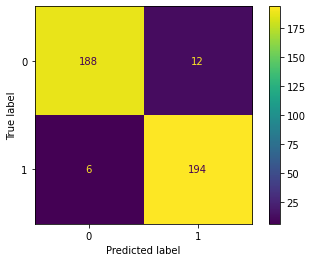

In [58]:
figure = plt.figure()
display = ConfusionMatrixDisplay(confusion_matrix=sum_confusion_matrix(confusion_matrix_list_svm_obifs))
display.plot()
plt.savefig('mc_svm_obifs.png')

<Figure size 432x288 with 0 Axes>

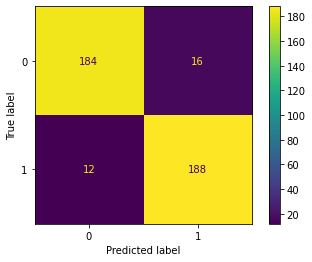

In [57]:
figure = plt.figure()
display = ConfusionMatrixDisplay(confusion_matrix=sum_confusion_matrix(confusion_matrix_list_knn_obifs))
display.plot()
plt.savefig('mc_knn_obifs.png')

<Figure size 432x288 with 0 Axes>

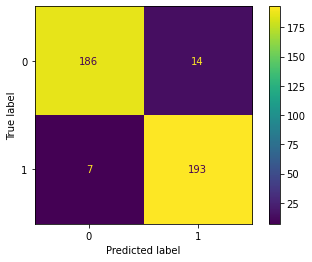

In [56]:
figure = plt.figure()
display = ConfusionMatrixDisplay(confusion_matrix=sum_confusion_matrix(confusion_matrix_list_svm_bsif))
display.plot()
plt.savefig('mc_svm_bsif.png')

<Figure size 432x288 with 0 Axes>

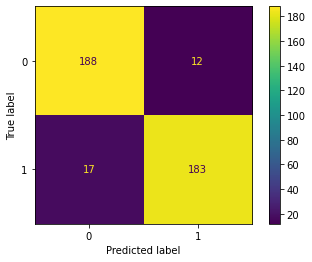

In [55]:
figure = plt.figure()
display = ConfusionMatrixDisplay(confusion_matrix=sum_confusion_matrix(confusion_matrix_list_knn_bsif))
display.plot()
plt.savefig('mc_knn_bsif.png')